---

----

# Manual de uso del módulo PyElectrica

---

---

Este Notebook se presenta como un manual de uso del módulo PyElectrica. El Notebook contiene el ejemplo de uso de cada una de las funciónes disponibles en el módulo en la versión actual: PyElectrica V1.1.2.

---

## << CIRCUITOS ELÉCTRICOS >>

---

## Función leyOhm

In [12]:
from pyelectrica import leyOhm
help(leyOhm) 

Help on function leyOhm in module pyelectrica.pyelectrica:

leyOhm(**param)
    Función para calcular la Ley de Ohm, en base al parámetro
    con incognita '?'.
    
    Ejemplo:
    leyOhm(V='?', I=3, R=4)
    
    V = Valor de tensión
    I = Valor corriente
    R = Valor de resistencia
    
    IMPORTANTE: Se debe indicar dos valores numericos y el valor
                que se quiere calcular indicando su valor con la
                cadena de texto: '?'
    
                Ejemplo:
                # Para calcular el voltaje:
                leyOhm(V='?', I=3, R=4)
    
                # Para calcular la resistencia:
                leyOhm(V=24, I=3.5, R='?')
    
                # Para calcular la corriente:
                leyOhm(V=12, I='?', R=5)
    
                ** La función acepta números complejos **



In [13]:
leyOhm(V=24, I='?', R=3.5) 

I = 6.857 A


In [14]:
leyOhm(V='?', I=3+35j, R=2+5j) 

V = (-169+85j) V


---

## Función vNodos

In [15]:
from pyelectrica import vNodos
help(vNodos) 

Help on function vNodos in module pyelectrica.pyelectrica:

vNodos(A, B)
    Función vNodos, que resuelve un sistema de ecuaciones en forma
    matricial y entrega los correspondientes voltajes de nodo en base
    al sistema de ecuaciones del circuito.
    
    Ejemplo:
    vNodos(A, B)
    
    A = lista que define la matriz de coeficiente.
    B = lista que define la matriz del vector solución.



In [16]:
A = [
    [1+3j, 2+2j, 3+5j],
    [4+2j, 0, 6+2j],
    [7+2j, 8+6j, 0]
]
B = [
    [18+25j],
    [15+35j],
    [12+40j]
]
vNodos(A, B)  

Los voltajes de nodo del circuito son:

v1 = (-3.758+10.622j) Volts
v2 = (3.154-5.72j) Volts
v3 = (7.693-2.56j) Volts


---

## Función "iLazos" e "iLazosV"

In [17]:
from pyelectrica import iLazos, iLazosV
help(iLazos) 

Help on function iLazos in module pyelectrica.pyelectrica:

iLazos(A, B)
    Función iLazos, que resuelve un sistema de ecuaciones en forma
    matricial y entrega las correspondientes corrientes de lazo en base
    al sistema de ecuaciones del circuito.
    
    Ejemplo:
    iLazos(A, B)
    
    A = lista que define la matriz de coeficiente.
    B = lista que define la matriz del vector solución.



In [18]:
A = [
    [1, 0, 2, 8],
    [2, 9, 3, 7],
    [9, 2, 8, 4],
    [7, 4, 6, 5]
]
B = [
    [15],
    [-10],
    [0],
    [8]
]
iLazos(A, B) 

Las corrientes de lazo del circuito son:

i1 = 14.267 Amperes
i2 = -1.872 Amperes
i3 = -17.861 Amperes
i4 = 4.557 Amperes


### Usando la función iLazosV

La función iLazosV entrega una matriz de resultados, los cuales pueden ser operados segun criterios personales de análisis. 


In [19]:
corrientes = iLazosV(A, B) 
corrientes

array([[ 14.26704545],
       [ -1.87215909],
       [-17.86079545],
       [  4.55681818]])

In [20]:
i1 = corrientes[0,0] 
i1

14.267045454545476

In [21]:
r1 = 5.5
vx = i1 * r1
vx

78.46875000000011

In [22]:
print('El voltaje vx =', round(vx, 3), 'Volts') 

El voltaje vx = 78.469 Volts


---

## Función "bode" y "bodeNb"

In [23]:
from pyelectrica import bode
from pyelectrica import bodeNb
help(bode) 

Help on function bode in module pyelectrica.pyelectrica:

bode(num, den)
    Función que genera los diagramas de Bode para una función  de
    transferencia, indicada por su numerador (num) y denominador(den).
    
    Ejemplo:
    bode(num, den)
    
    num = valores en formato de lista, que contiene lo valores del
          númerador de la fución de transferencia.
    
    den = valores en formato de lista, que contiene los valores del
          denominador de la función de transferencia.



In [24]:
num = [-0.1,-2.4,-181,-1950]
den = [1,3.3,990,2600] 

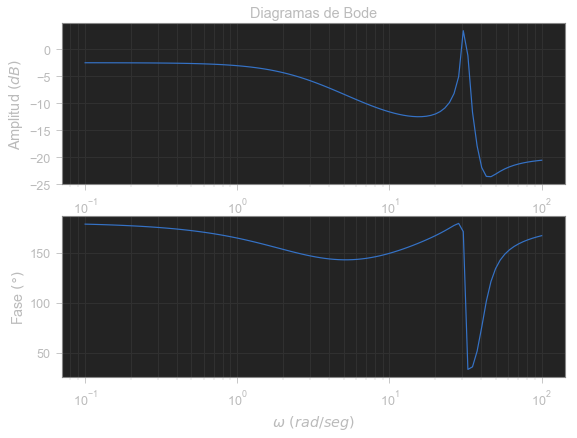

In [25]:
bode(num, den) 

### Usando la función bodeNB

\* Función recomendada cuando se trabaja en Jupyter Notebook.

La función _bodeNB_ genera el mismo resultado que la función _bode_, con la excepción que el diagrama de amplitud y fase se generan en graficos separados para mejorar la visualización.

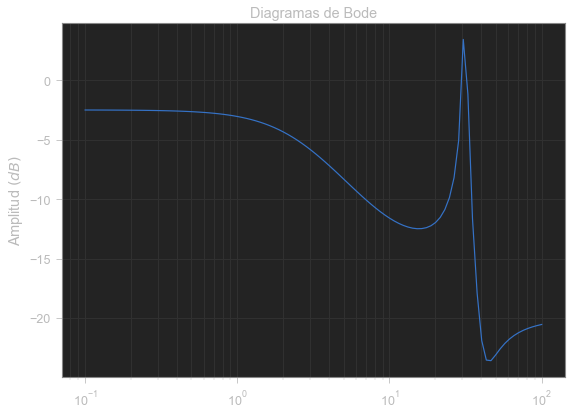

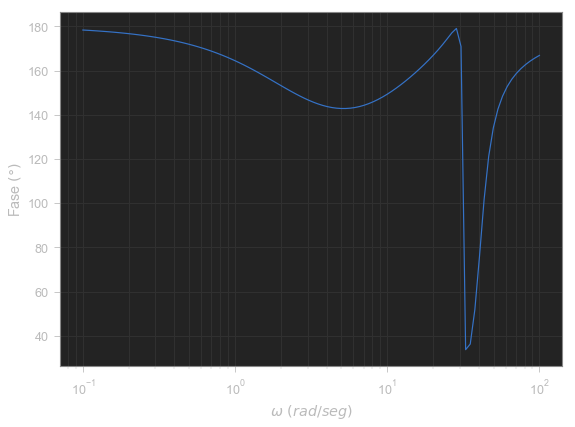

In [26]:
bodeNb(num, den) 

---

## Función "escalon"

In [27]:
from pyelectrica import escalon
help(escalon) 

Help on function escalon in module pyelectrica.pyelectrica:

escalon(num, den)
    Función escalón, para generar la respuesta escalón en base a una
    función de transferencia.
    
    Ejemplo:
    escalon(num, den)
    
    num = valores en formato de lista, que contiene lo valores del
          númerador de la fución de transferencia.
    
    den = valores en formato de lista, que contiene los valores del
          denominador de la función de transferencia.



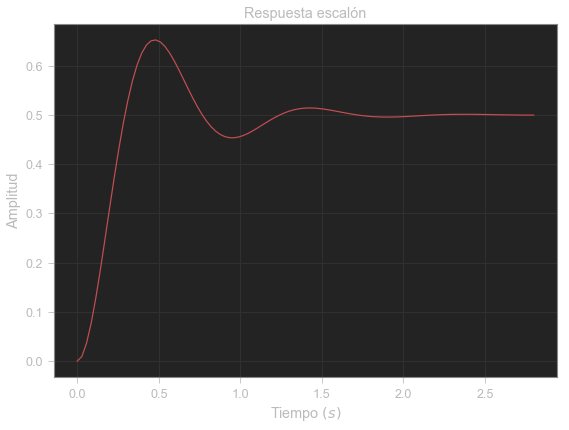

In [28]:
num = [25]
den = [1, 5, 50]
escalon(num, den) 

---

## Función "c_1orden"

In [29]:
from pyelectrica import c_1orden
help(c_1orden) 

Help on function c_1orden in module pyelectrica.pyelectrica:

c_1orden(**kwarg)
    Función para calcular y dibujar la gráfica de la curva de respuesta
    en un circuito RC o RL sin fuente, tomando como base a los parámetros
    indicados en la función.
    
    Ejemplo1:
    c_1orden(R, t, Vi=18, C=0.1) * Para circuitos RC
    
    Ejemplo1:
    c_1orden(R, t, Ii=18, L=0.5) * Para circuitos RL
    
    Donde:
    R = Resistencia del circuito
    t = el tiempo máximo a tomar en cuenta para la grafica
        *(Para mejores efectos visuales: 1 > t < 10)
    Vi = Voltaje inicial en el capacitor
    Ii = Corriente inicial en el inductor
    C = Valor del capacitor
    L = Valor del inductor



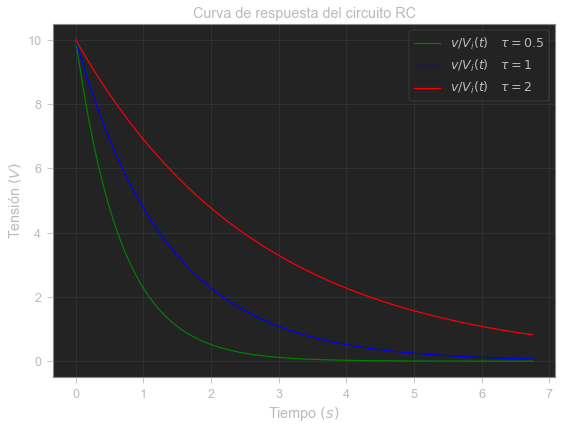

In [30]:
c_1orden(Vi=10, R=4.5, C=0.3) 

---

## << MÁQUINAS ELÉCTRICAS >>

---

## Función mLineal_CD

In [31]:
from pyelectrica import mLineal_CD
help(mLineal_CD) 

Help on function mLineal_CD in module pyelectrica.pyelectrica:

mLineal_CD(Vb=120, R=0.5, l=1, B=0.5)
    Función "mLineal_CD", util para calcular el comportamiento de una
    máquina lineal CD en base a los parámetros declarados.
    
    Ejemplo:
    mLineal_CD(Vb, R, l, B)
    
    Vb = Voltaje de la batería
    R = Resistencia del diagrama de la máquina lineal CD
    l = longitud del conductor en el campo magnético
    B =  Vector de densidad de flujo magnético



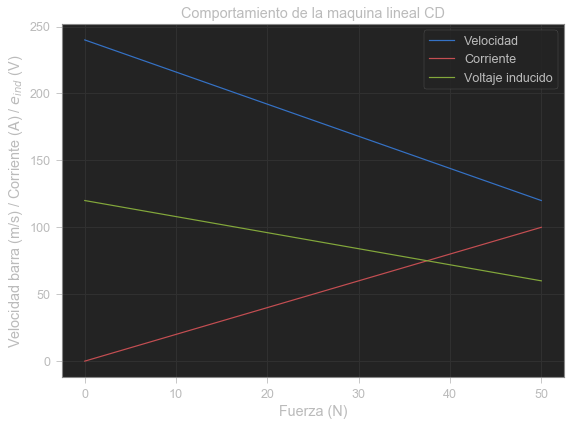

In [32]:
mLineal_CD(Vb=120, R=0.6, l=1, B=0.5) 

---

## Función "compCA_GenSinc"

In [33]:
from pyelectrica import compCA_GenSinc
help(compCA_GenSinc) 

Help on function compCA_GenSinc in module pyelectrica.pyelectrica:

compCA_GenSinc(Sbase=100000000, Vbase=13800.0, Xs=1.0, X1p=0.25, X2p=0.12, T1p=1.1, T2p=0.04)
    Función "compCA_GenSinc" para calcular la componente CA de la
    corriente de falla de un generador síncrono en base a los
    parámetros ingresados.
    
    Ejemplo:
    compCA_GenSinc(Sbase, Vbase, Xs, X1p, X2p, T1p, T2p)
    
    Donde:
    Sbase = Potencia aparente del generador síncrono
    Vbase = Voltaje base del generador síncrono
    Xs = Reactancia síncrona del generador síncrono
    X1p = Reactancia transitoria
    X2p = Reactancia subtrancitoria
    T1p = Constante de tiempo de la corriente transitoria
    T2p = Constante de tiempo de la corriente subtrancitoria



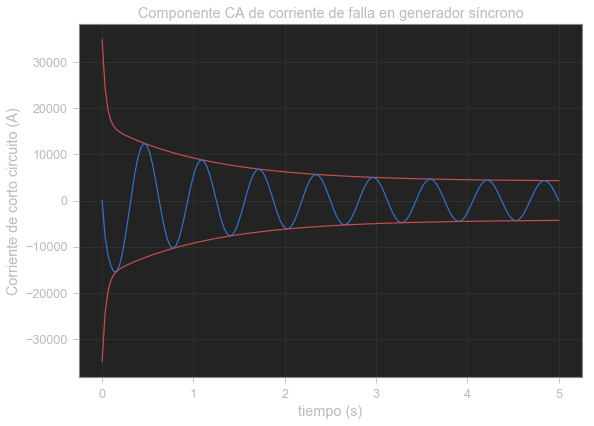

In [34]:
compCA_GenSinc(Sbase=100*10**6, Vbase=13.8*10**3, Xs=1.0, 
               X1p=0.25, X2p=0.12, T1p=1.1, T2p=0.04) 

---

## Función "par_vel"

In [35]:
from pyelectrica import par_vel

In [36]:
help(par_vel) 

Help on function par_vel in module pyelectrica.pyelectrica:

par_vel(Vn=460, Polos=4, R1=0.641, X1=1.106, R2=0.332, X2=0.464, Xm=26.3)
    Función "par_vel" para calcular y generar la gráfica de la curva
    Par-Velocidad de un motor de inducción con rotor devanado y/o
    rotor jaula de ardilla.
    
    Ejemplo:
    par_vel(Vn, Polos, R1, X1, R2, X2, Xm)
    
    Donde:
    Vn = Voltaje nominal del motor
    Polos = Número de polos del motor
    f = Frecuencia de operación del motor
    R1 = Resistencia del estator
    X1 = Reactancia del estator
    R2 = Resistencia del rotor
    X2 = Reactancia del rotor
    Xm = Reactancia de magnetización



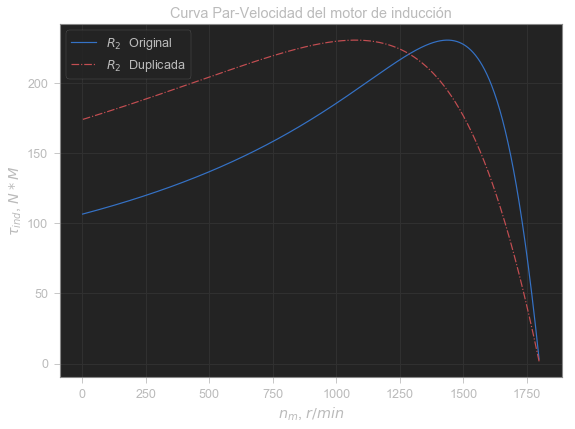

In [37]:
par_vel(Vn=460, Polos=4, R1=0.641, X1=1.106, R2=0.332, X2=0.464, Xm=26.3) 